In [1]:
# Import dependencies
from sklearn import tree
import pandas as pd
import warnings
warnings.simplefilter('ignore')
import os

In [2]:
# Read the CSV
heart = pd.read_csv("cleaned_cardio.csv")
heart.head()

age  height  weight  ap_hi  ap_lo  cardio        BMI  gender_1  gender_2  \
0  50.0    66.0   136.0    110     80       0  21.948577         0         1   
1  55.0    61.0   187.0    140     90       1  35.329481         1         0   
2  52.0    65.0   141.0    130     70       1  23.461065         1         0   
3  48.0    67.0   180.0    150    100       1  28.188906         0         1   
4  48.0    61.0   123.0    100     60       0  23.238108         1         0   

   cholesterol_1  ...  cholesterol_3  gluc_1  gluc_2  gluc_3  smoke_0  \
0              1  ...              0       1       0       0        1   
1              0  ...              1       1       0       0        1   
2              0  ...              1       1       0       0        1   
3              1  ...              0       1       0       0        1   
4              1  ...              0       1       0       0        1   

   smoke_1  alco_0  alco_1  active_0  active_1  
0        0       1       0         0         1  
1        0       1       0         0         1  
2        0       1       0         1         0  
3        0       1       0         0         1  
4        0       1       0         1         0  

[5 rows x 21 columns]

In [3]:
target = heart["cardio"].values.reshape(-1,1)
target_names = ["no-attack", "attack"]

In [4]:
data = heart.drop("cardio", axis=1)
feature_names = data.columns
data.head()

age  height  weight  ap_hi  ap_lo        BMI  gender_1  gender_2  \
0  50.0    66.0   136.0    110     80  21.948577         0         1   
1  55.0    61.0   187.0    140     90  35.329481         1         0   
2  52.0    65.0   141.0    130     70  23.461065         1         0   
3  48.0    67.0   180.0    150    100  28.188906         0         1   
4  48.0    61.0   123.0    100     60  23.238108         1         0   

   cholesterol_1  cholesterol_2  cholesterol_3  gluc_1  gluc_2  gluc_3  \
0              1              0              0       1       0       0   
1              0              0              1       1       0       0   
2              0              0              1       1       0       0   
3              1              0              0       1       0       0   
4              1              0              0       1       0       0   

   smoke_0  smoke_1  alco_0  alco_1  active_0  active_1  
0        1        0       1       0         0         1  
1        1        0       1       0         0         1  
2        1        0       1       0         1         0  
3        1        0       1       0         0         1  
4        1        0       1       0         1         0

In [5]:
# Set up train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [6]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.6398087686567164

In [7]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=300)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.7089552238805971

In [8]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.1860343850315062, 'ap_hi'),
 (0.18537580196937134, 'BMI'),
 (0.1778543919723102, 'age'),
 (0.15026943708220708, 'weight'),
 (0.10070512797566349, 'height'),
 (0.09295350059389886, 'ap_lo'),
 (0.01636316594702015, 'cholesterol_1'),
 (0.01581226410891104, 'cholesterol_3'),
 (0.008487198943896875, 'gender_2'),
 (0.008468098889597639, 'gender_1'),
 (0.007834209550403384, 'gluc_1'),
 (0.007094049616911191, 'active_1'),
 (0.007070112956587415, 'active_0'),
 (0.0061548615212879175, 'cholesterol_2'),
 (0.00548349373023199, 'gluc_2'),
 (0.005441795296659644, 'gluc_3'),
 (0.0049883834311305, 'smoke_1'),
 (0.004901114721869791, 'smoke_0'),
 (0.004355426714994536, 'alco_0'),
 (0.004353179945540853, 'alco_1')]

In [9]:
# Perform GridSearch on RF
from sklearn.model_selection import GridSearchCV

params = {'criterion':['gini','entropy'],
          'n_estimators':[10,15,20,25,30],
          'min_samples_leaf':[1,2,3],
          'min_samples_split':[3,4,5,6,7], 
          'random_state':[123],
          'n_jobs':[-1]}

rfgs = GridSearchCV(rf, param_grid=params, n_jobs=-1)
rfgs.fit(X_train, y_train)
print("Best Hyper Parameters:\n",rfgs.best_params_)
prediction=rfgs.predict(X_test)

Best Hyper Parameters:
 {'criterion': 'entropy', 'min_samples_leaf': 3, 'min_samples_split': 7, 'n_estimators': 30, 'n_jobs': -1, 'random_state': 123}


In [11]:
# Print Accuracy
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(prediction,y_test))

Accuracy: 0.7375233208955224


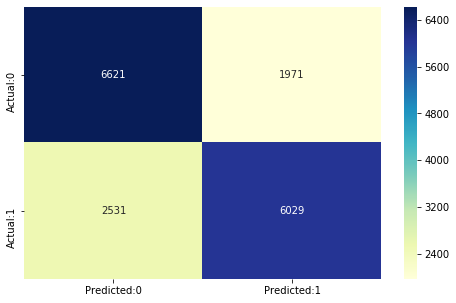

In [14]:
# Perform Confusion matrix on RF
from sklearn.metrics import confusion_matrix
import seaborn as sn
%matplotlib inline
import matplotlib.pyplot as plt

cm=confusion_matrix(y_test,prediction)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")